# Beschreibung des Projekts

Unser Projekt ist eine Anwendung zur Analyse und Visualisierung von Wettervorhersagen-Daten der One Call API von OpenWeatherMap. Es besteht aus mehreren Modulen und Klassen, die spezifische Aufgaben übernehmen, um die Wetterdaten effizient zu verarbeiten und darzustellen.

## Module und Klassen

- `Singleton`: Klasse die nur einmal instanziert werden kann
- `WeatherDataFetcher` (Singleton): Abrufen von Wetterdaten von der One Call API.
- `WeatherHelper`: Aufbereitung der Wetterdaten für die Visualisierung.
- `WeatherPlotter`: Visualisierung der Wetterdaten in Diagrammen.
- `LocationWeatherData`: Wetterdaten eines Orts
- `TemperatureData`: Temperaturinformationen
- `PrecipitationData`: Niederschlagsdaten
- `WindData`: Winddaten

## Workflow
1. Koordinaten eines Orts mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage).  
2. Wettervorhersagedaten dieser Koordinaten mit der `WeatherDataFetcher`-Klasse suchen (API-Anfrage) und in ein `LocationWeatherData`-Objekt umwandeln.  
3. Das `LocationWeatherData`-Objekt mit der `WeatherHelper`-Klasse in ein pandas Dataframe umwandeln.  
4. Falls nötig, die DataFrames mit der `WeatherAnalyzer`-Klasse normalisieren (Datum).  
5. Diagramme anhand der Dataframes mit der `WeatherPlotter`-Klasse anzeigen.  


In [1]:
from weather import WeatherHelper
from weather import WeatherDataFetcher
from weather import WeatherPlotter

# Instanzen der Klassen erstellen
fetcher  = WeatherDataFetcher()
helper   = WeatherHelper()   
plotter  = WeatherPlotter()

### Beispiel CSV

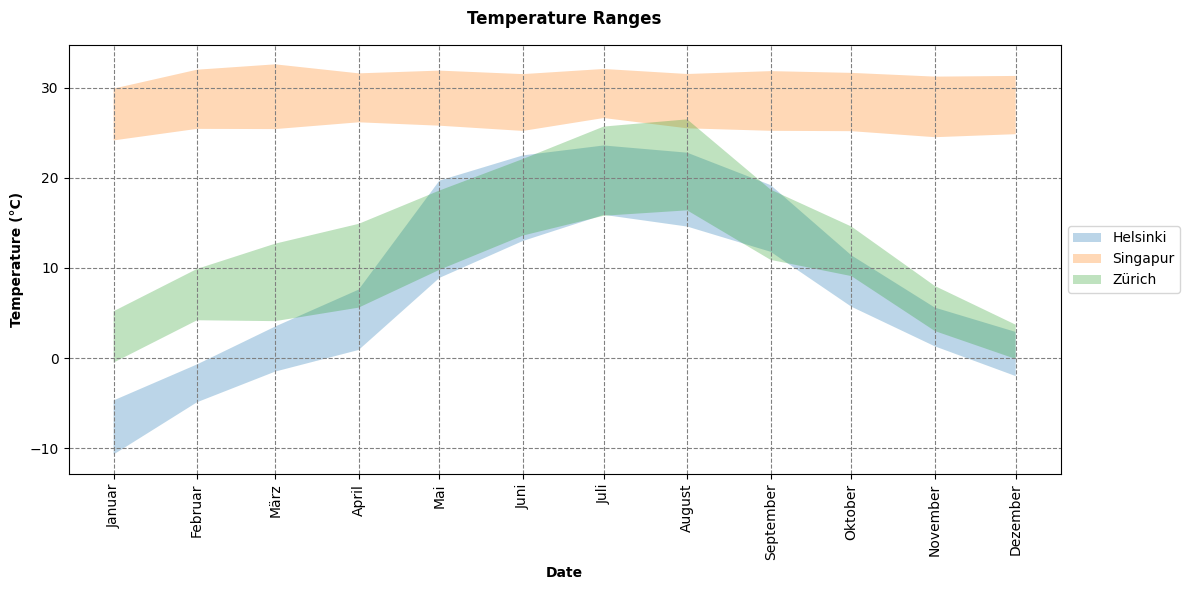

In [2]:

weather_data_instances = fetcher.get_weather_data_from_csv("data/wetterdaten_2024_drei_staedte.csv")
if weather_data_instances:

    # Erstellen Sie ein Dictionary, um die Wetterdaten für jeden Standort zu speichern
    location_data = {}

    # Iterieren Sie über die Liste der Wetterdaten-Instanzen und normalisierten DataFrames
    for i in range(len(weather_data_instances)):
        location_instance            = weather_data_instances[i]
        location_name                = location_instance.location_name
        location_dataframe           = helper.create_dataframe(location_instance)
        location_data[location_name] = location_dataframe  

    x_labels = ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"]
    plotter.plot_min_max_temperatures(location_data, x_labels)